In [16]:
%matplotlib widget
import problem_analysis as pa
import matplotlib.pyplot as plt
import matplotlib as mpl
import util
import seaborn as sns
import importlib
import numpy as np
import ddnet

try:
    importlib.reload(dd)
except NameError:
    import disjoint_domain as dd

plt.rcParams['svg.fonttype'] = 'none'

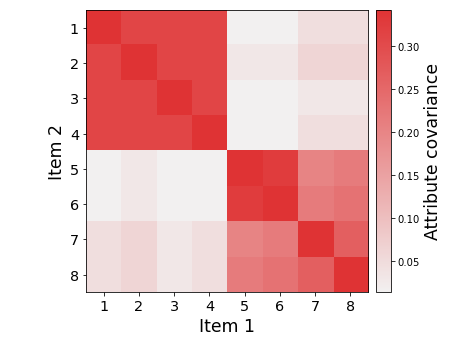

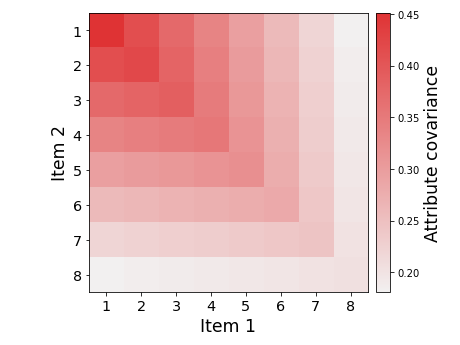

In [17]:
# Make plots of attribute correlation for each disjoint-domain structure

cluster_infos_all = {
    'hierarchy': {'clusters': '4-2-2', 'organized': True},
    'ordering': {'clusters': 'saxe-ordering', 'n_set_step': 3},
}
cluster_infos_all['ordering_scrambled'] = {**cluster_infos_all['ordering'], 'special': ['scramble']}
cluster_infos_all['ordering_disorganized'] = {**cluster_infos_all['ordering'], 'organized': False}

cluster_infos = {k: v for k, v in cluster_infos_all.items() if k in ['hierarchy', 'ordering']}

simple_net_params = {
    'n_domains': 4, 'use_ctx_repr': False, 'use_ctx': False,
    'attrs_per_context': 200, 'hidden_units': 48, 'ctx_per_domain': 1,
    'fix_biases': True, 'fixed_bias': 0
}
simple_net_params = {**ddnet.net_defaults, **simple_net_params}

figs = []
# cmap = sns.light_palette('maroon', as_cmap=True)
# cmap = sns.light_palette('#A8363A', as_cmap=True)  # positive half of vlag
cmap = sns.light_palette((12, 80, 50), input='husl', as_cmap=True)  # positive half of map used for imshow_centered_bipolar

for name, cluster_info in cluster_infos.items():
    fig, ax = plt.subplots()
    figs.append(fig)
    _, _, attr_mat = dd.make_io_mats(**{**simple_net_params, 'n_domains': 1, 'cluster_info': cluster_info})
    attr_corr = pa.get_attribute_rdm(attr_mat, metric='covar_centered')
    im = ax.imshow(attr_corr, cmap=cmap, interpolation='nearest')
    
#     cb = util.add_colorbar(im)  # for some reason makes alignment not work in illustrator
    cb = fig.colorbar(im, ax=ax, pad=0.02)
    cb.set_label('Attribute covariance', size='xx-large')
    ax.set_xticks(range(dd.ITEMS_PER_DOMAIN))
    ax.set_xticklabels([str(n+1) for n in range(dd.ITEMS_PER_DOMAIN)], size='x-large')
    ax.set_xlabel('Item 1', size='xx-large')
    ax.set_yticks(range(dd.ITEMS_PER_DOMAIN))
    ax.set_yticklabels(ax.get_xticklabels(), size='x-large')
    ax.set_ylabel('Item 2', size='xx-large')
    
    fig.tight_layout()
    util.print_svg(fig, f'figures/hierarchy_saxe_ordering/{name}_attr_corr.svg')
    plt.show()

# plt.show()

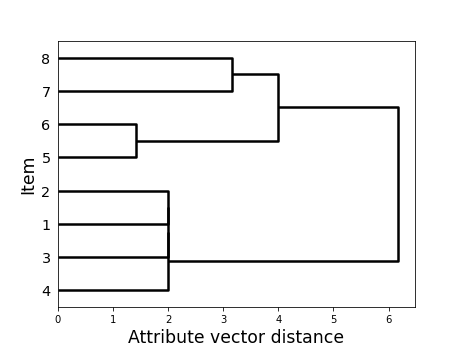

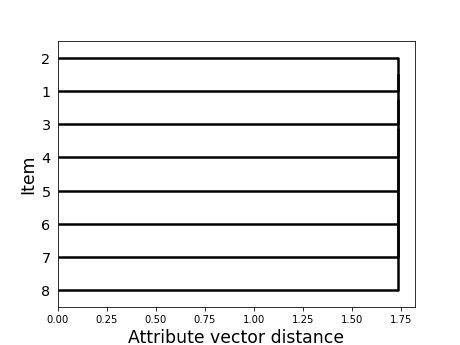

In [4]:
# Dendrograms
figs = []

for name, cluster_info in cluster_infos.items():
    fig, ax = plt.subplots()
    figs.append(fig)
    net_params = {**simple_net_params, 'n_domains': 1, 'cluster_info': cluster_info}
    dd.plot_item_attribute_dendrogram(ax, metric='euclidean', rel_color_thresh=0,
                                      **net_params)
    
    curr_ylabels = ax.get_yticklabels()
    ax.set_yticklabels([label.get_text()[1] for label in curr_ylabels], size='x-large')  # remove 'A'
    ax.set_ylabel('Item', size='xx-large')
    ax.set_xlabel('Attribute vector distance', size='xx-large')
    ax.set_title('')
    
    util.print_svg(fig, f'figures/hierarchy_saxe_ordering/{name}_dendrogram.svg')
    plt.show()

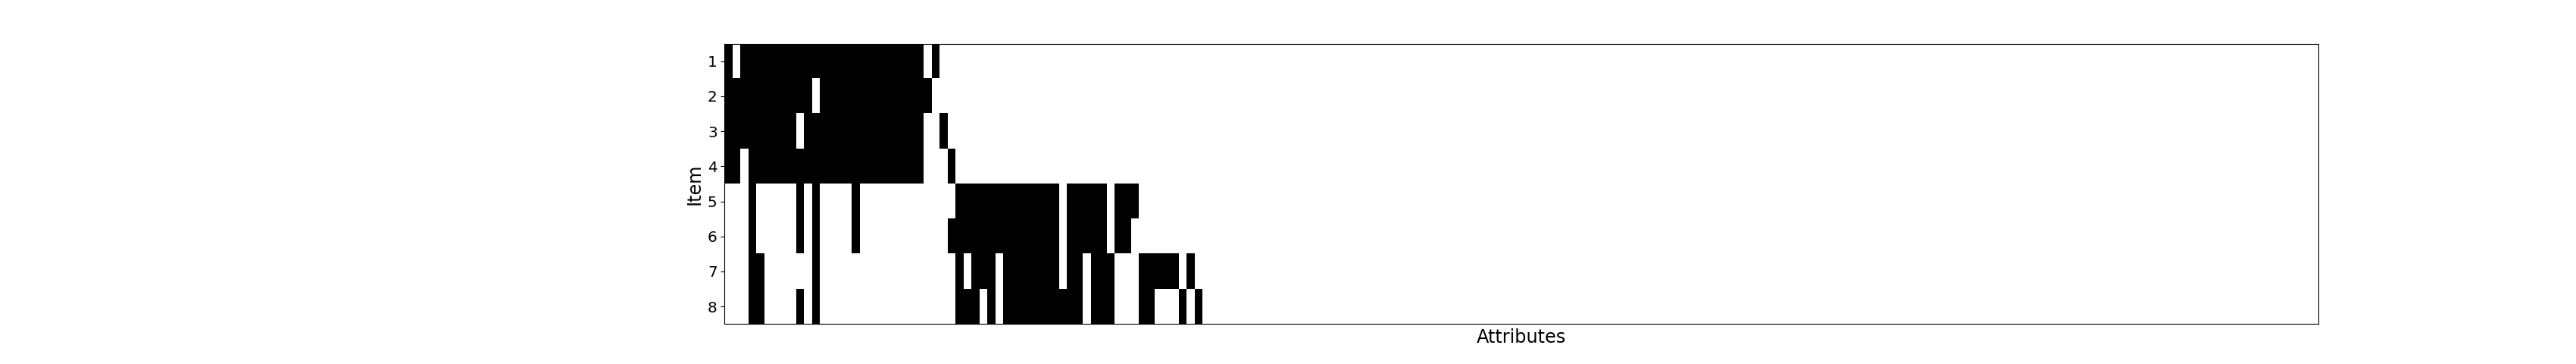

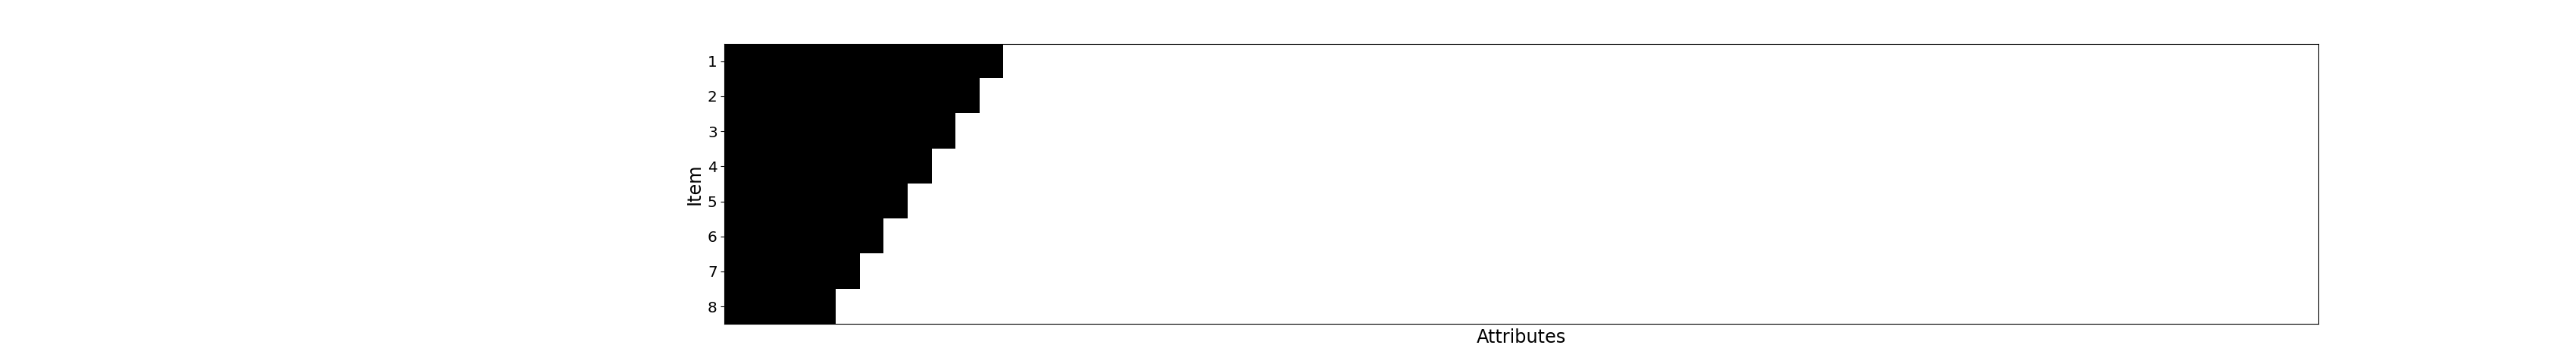

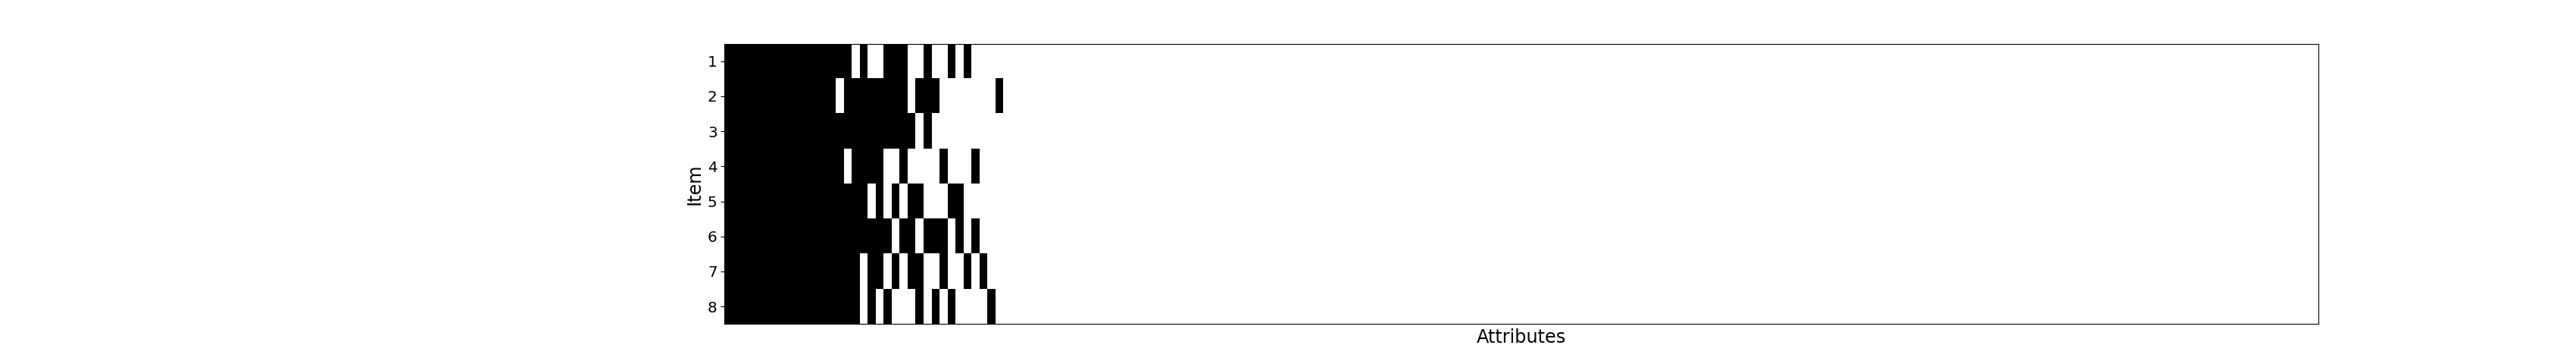

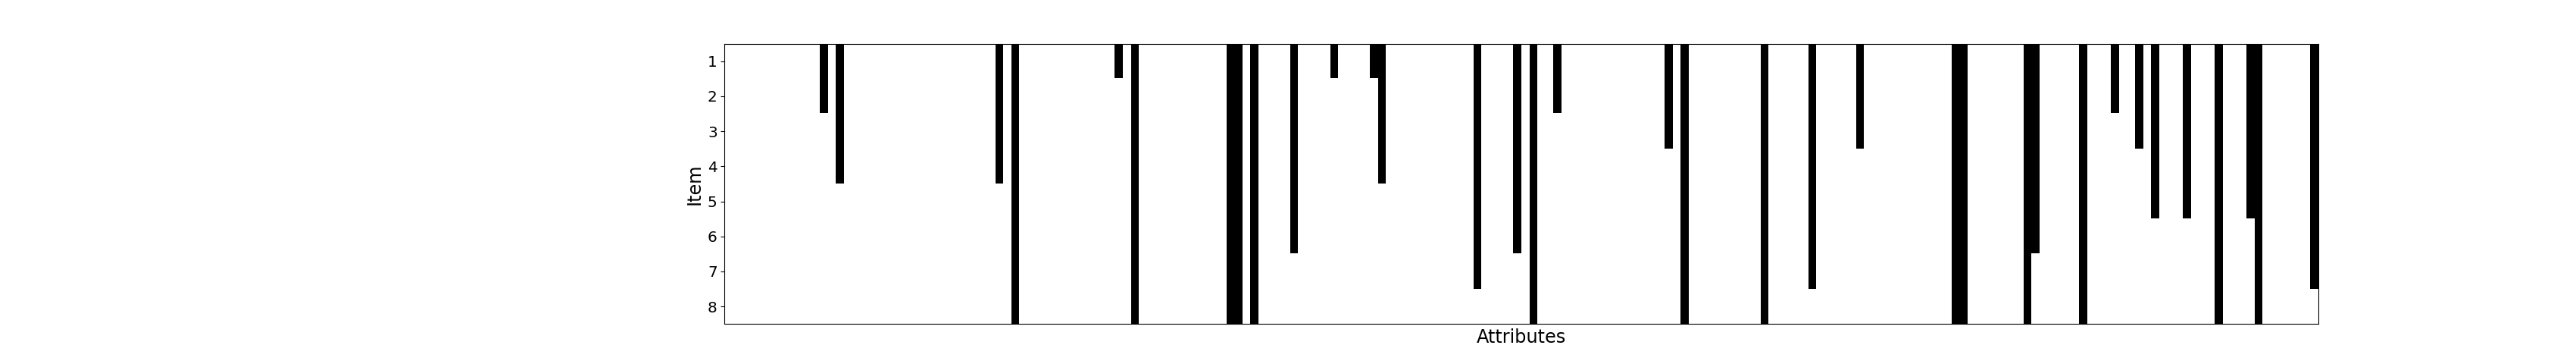

In [18]:
# Try making attribute plots instead
figs = []

for name, cluster_info in cluster_infos_all.items():
    net_params = {**simple_net_params, 'n_domains': 1, 'cluster_info': cluster_info}
    
    with mpl.rc_context({'image.cmap': 'binary'}):
        fig, axs = dd.plot_item_attributes(ctx_per_domain=1, attrs_per_context=net_params['attrs_per_context'],
                                           attrs_set_per_item=net_params['attrs_set_per_item'], cluster_info=cluster_info, figsize=(34, 4.8))
    
    axs[0].remove()
    axs[1].remove()
    ax = axs[2]
    ax.set_yticks(range(dd.ITEMS_PER_DOMAIN))
    ax.set_yticklabels([str(n+1) for n in range(dd.ITEMS_PER_DOMAIN)], size='x-large')
    ax.set_ylabel('Item', size='xx-large')
    ax.set_title('')
    ax.set_xticks([])
    ax.set_xlabel('Attributes', size='xx-large')
    figs.append(fig)
    
    # util.print_svg(fig, f'figures/hierarchy_saxe_ordering/{name}_attrs.svg')
    plt.show()